# Project Title: Bankruptcy Prediction Analysis 
## Course: CS 513 Knowledge Discovery and Data Mining
## Group Members: 
### Preet Jhanglani 10474322 Section A
### Girish Budhrani 10477624 Section A
### Anirudh Jeevan  10475896 Section A
### Surya Giri      10475010 Section B
<br>

### 1) Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)

### 2) Reading the Bankruptcy Data

In [4]:
data = pd.read_csv('Data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

#### This data contains 6819 rows and 96 columns. Performing EDA to understand it better

### 3) EDA

In [6]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


#### Checking the description of all columns

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.describe())

         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                          

##### The above description shows the mismatch in the ranges of all the columns. We will have to check for Category and Numerical values and later normalize the numerical features

#### List of Columns

In [9]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

#### Checking for NULL values in the data

In [10]:
data.isnull().values.any()

False

#### Checking numerical and categorical features

In [11]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index

data[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

#### Checking correlation of Bankrupt feature with top 10 features

In [12]:
positive_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values(ascending=False)[:10].index.tolist()
negative_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values()[:10].index.tolist()

positive_corr = data[positive_corr + ["Bankrupt?"]].copy()
negative_corr = data[negative_corr + ["Bankrupt?"]].copy()

#### Count plot of Bankrupt

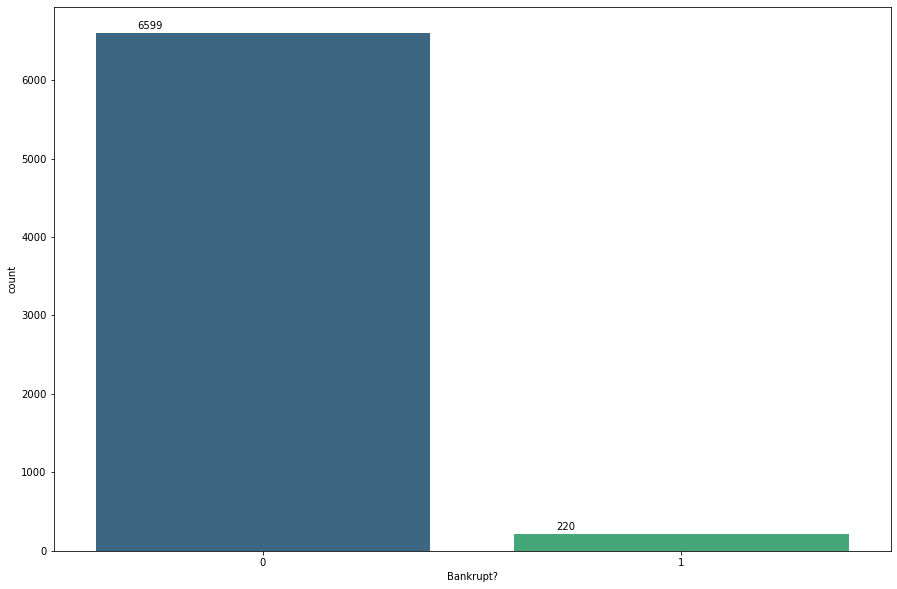

In [13]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x = 'Bankrupt?',data=data,palette = 'viridis')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [14]:
corr_bankrupt = pd.DataFrame(data = data.corr()['Bankrupt?']).sort_values(by='Bankrupt?', ascending=False)

### Co-relation Heatmap Plot Bankrupt v/s all the features

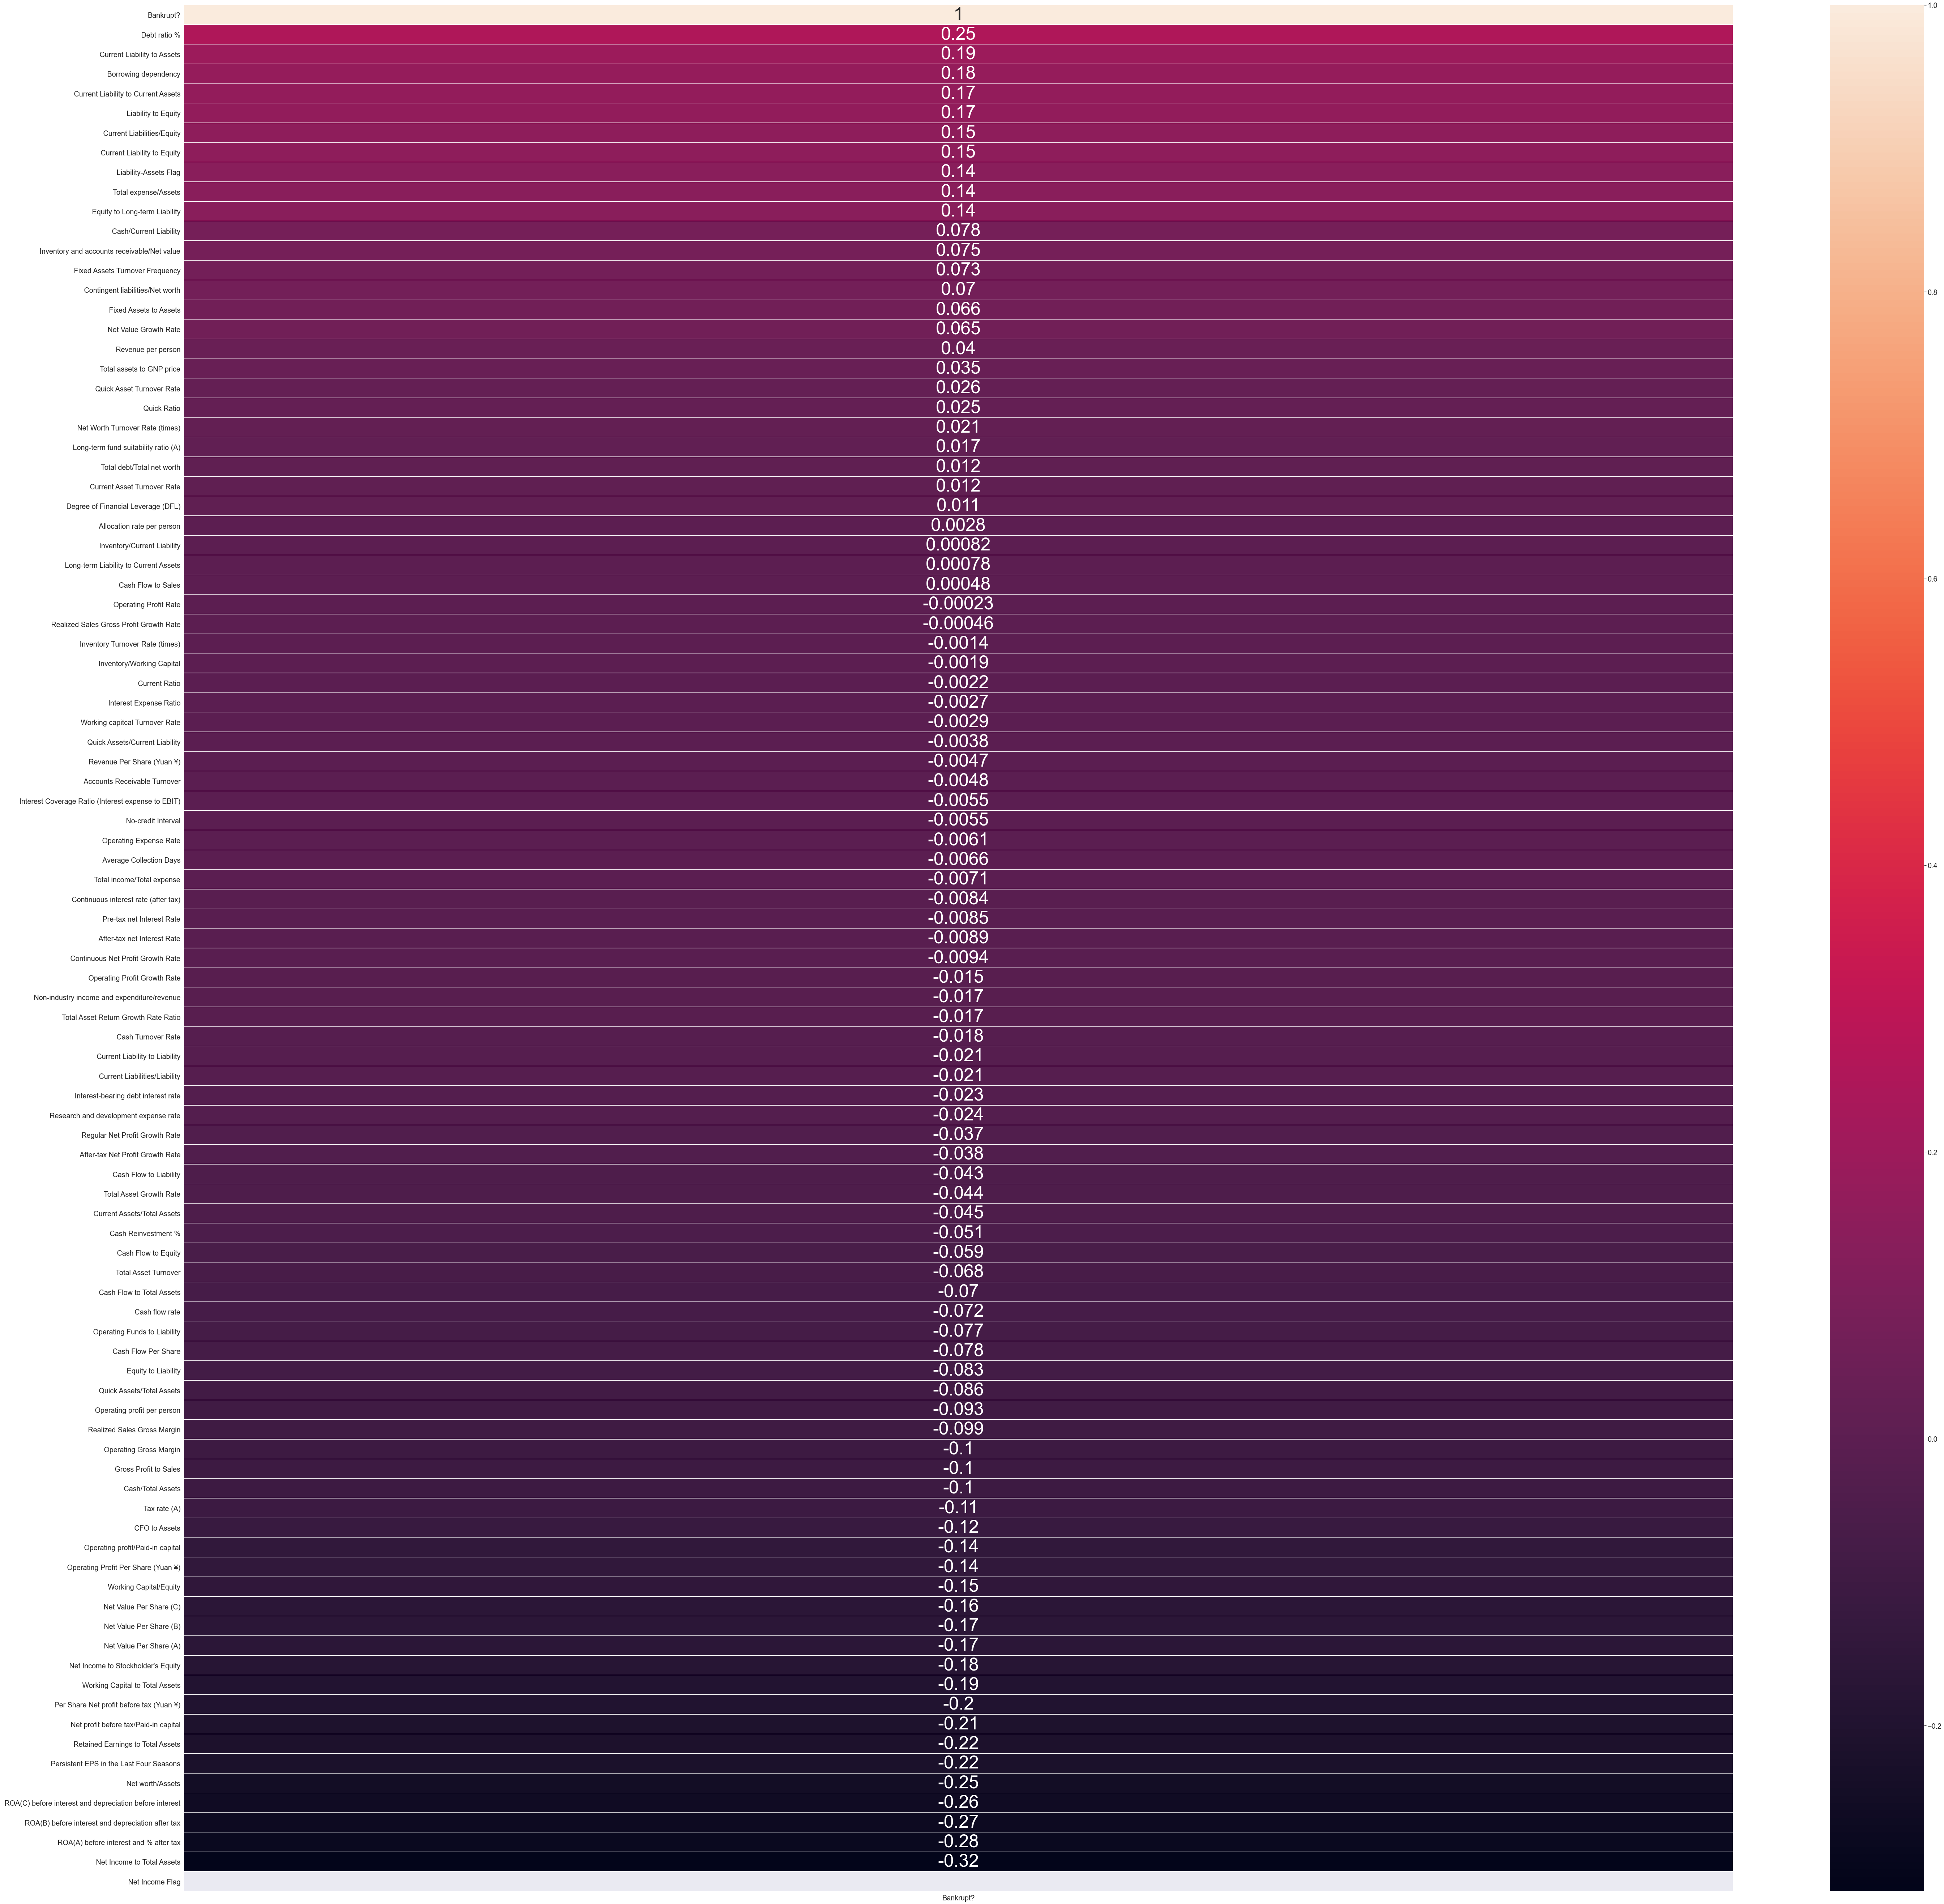

In [15]:
plt.figure(figsize=(96,96))
sns.set(font_scale = 1.8)
hm = sns.heatmap(data = corr_bankrupt, annot=True, linewidths=0.25, annot_kws={"size" : 50})
plt.show(hm)

### Interactive Co-relation Plot

In [16]:
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist()}

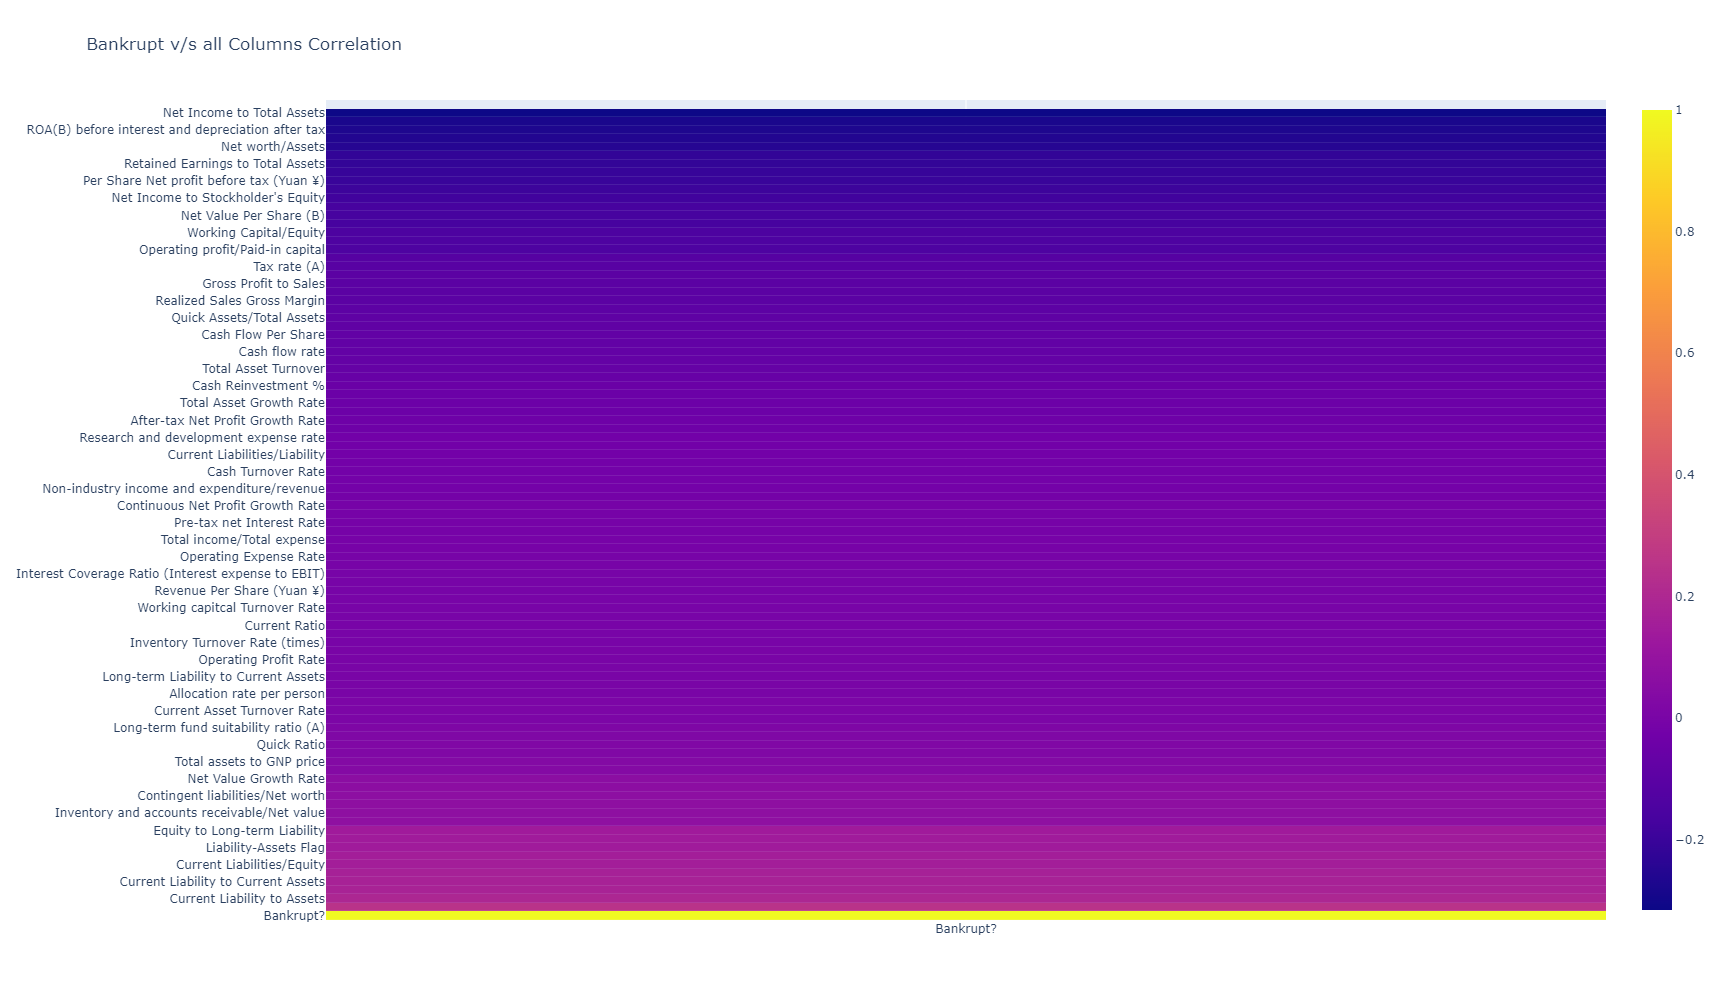

In [17]:
fig = go.Figure(go.Heatmap(df_to_plotly(corr_bankrupt), ygap=0.1))
fig.update_layout(
    title="Bankrupt v/s all Columns Correlation",
    autosize=False,
    width=1500,
    height=1000,
    paper_bgcolor="White",
)
fig.show()

### Scatter Plot between top two co-relations

In [18]:
scatter_data = data[['Bankrupt?',' Current Liability to Assets',' Current Liability to Current Assets' ]]

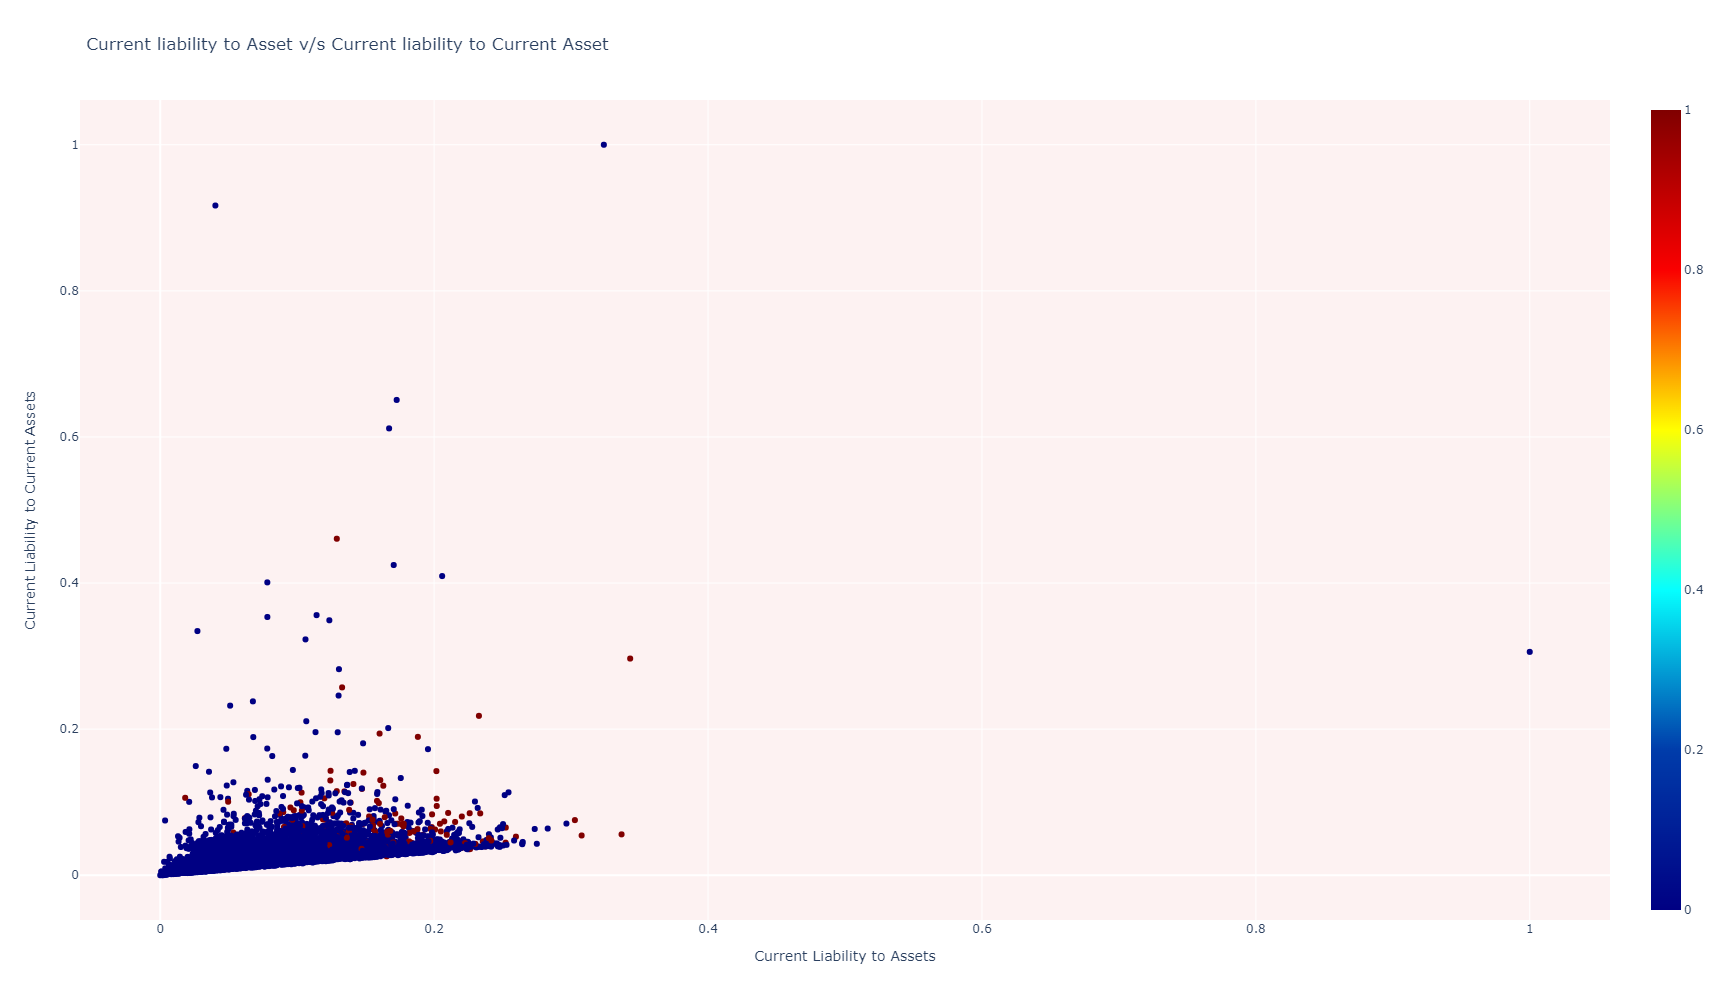

In [19]:
fig = go.Figure(go.Scatter(x=scatter_data[' Current Liability to Assets'], y = scatter_data[' Current Liability to Current Assets'], mode='markers', marker=dict(color = scatter_data['Bankrupt?'], colorscale='Jet', showscale=True)))
fig.update_layout(
    title="Current liability to Asset v/s Current liability to Current Asset",
    autosize=False,
    width=1500,
    height=1000,
    paper_bgcolor="White",
    plot_bgcolor='rgba(247, 207, 207, 0.27)',
    xaxis = dict(title = 'Current Liability to Assets'),
    yaxis = dict(title = 'Current Liability to Current Assets')
)
fig.show()

#### Top 10 co-relation heatmap

<AxesSubplot:>

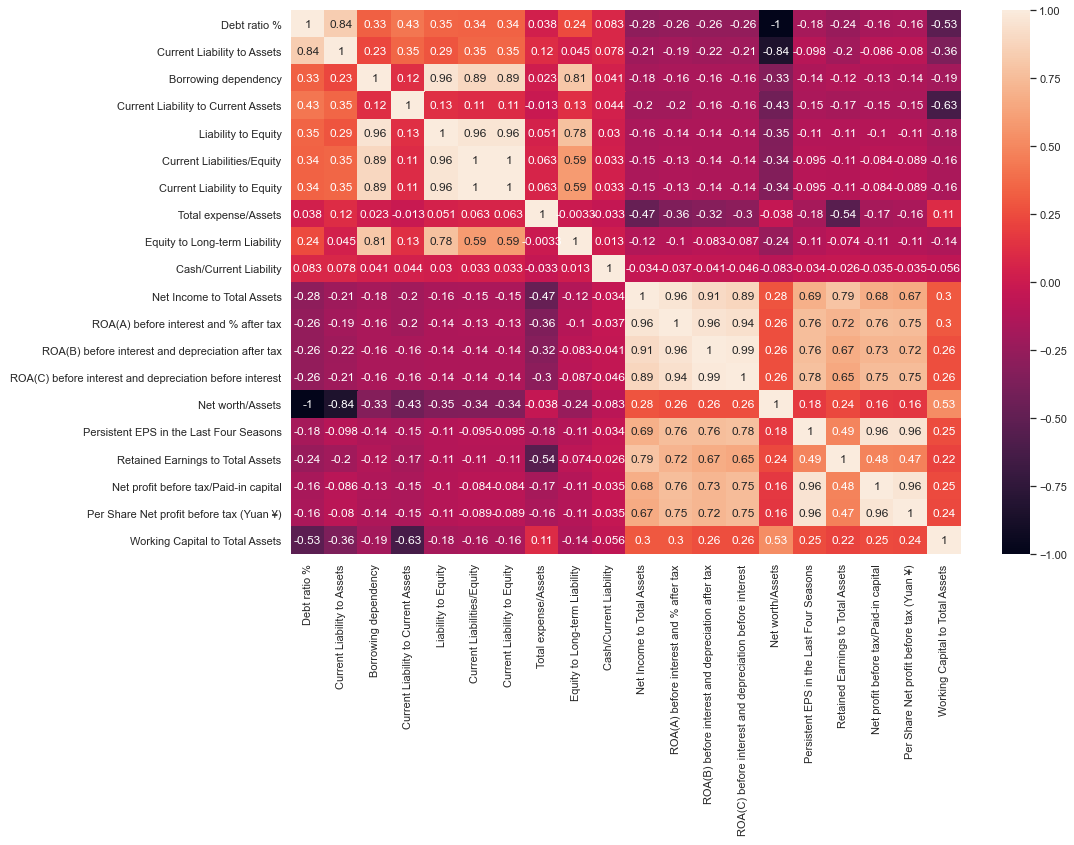

In [20]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(15,10))
sns.set(font_scale = 1)
sns.heatmap(data[relation].corr(),annot=True)

### 4) Data Modeling

In [21]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
data[numeric_features] = data[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))

data[numeric_features] = data[numeric_features].fillna(0)

##### The Data is now normalized.

### 5) Train Test Split

In [22]:
X = data.drop('Bankrupt?', axis=1)
Y = data['Bankrupt?']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### 6) Logistic Regression

In [42]:
classifier = LogisticRegression(random_state=0, max_iter=2000)
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=2000, random_state=0)

In [43]:
y_pred1 = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred1)
print(cm)
accuracy_score(Y_test, y_pred1)

[[1641   12]
 [  40   12]]


0.9695014662756598

### 7) Decision Trees

In [23]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [24]:
y_pred1 = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred1)
print(cm)
accuracy_score(Y_test, y_pred1)

[[1617   36]
 [  41   11]]


0.9548387096774194

#### Using Decision Tree, model achieved an accuracy of 95.4%. Trying other models to compare

### 8) KNN

In [25]:
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [26]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[1648    5]
 [  47    5]]


0.9695014662756598

#### KNN achieves an accuracy of 96.9%. Continuing testing other models

### 9) Naive Bayes

In [38]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [39]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
1 - accuracy_score(Y_test, y_pred)

[[ 475 1178]
 [   5   47]]


0.693841642228739

#### Naive Bayes only supports discrete data and due to mixture of continous data and discrete data the model is not able to properly predict. Lets try other models

### 10) Support Vector Machines

In [29]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [30]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[1649    4]
 [  47    5]]


0.9700879765395894

#### SVM achieves an accuracy of 97%. Thats great but still lets try different models

### 11) Random Forest

In [31]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [32]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[1639   14]
 [  44    8]]


0.9659824046920821

#### The Random Forest model performed well with an accuracy of 96.6%. 

### 12) Neural Net

In [33]:
model=Sequential()
model.add(Dense(1000,input_dim=95,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs=100, verbose=1)

Epoch 1/100
160/160 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9656 - val_loss: 0.0000e+00 - val_accuracy: 0.9695
Epoch 2/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9671 - val_loss: 0.0000e+00 - val_accuracy: 0.9695
Epoch 3/100
160/160 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9671 - val_loss: 0.0000e+00 - val_accuracy: 0.9695
Epoch 4/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9671 - val_loss: 0.0000e+00 - val_accuracy: 0.9695
Epoch 5/100
160/160 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.9671 - val_loss: 0.0000e+00 - val_accuracy: 0.9695
Epoch 6/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9671 - val_loss: 0.0000e+00 - val_accuracy: 0.9695
Epoch 7/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accura

In [37]:
prediction=model.predict(X_test)
cm = confusion_matrix(Y_test, prediction)
print(cm)
accuracy_score(Y_test, prediction)

[[1653    0]
 [  52    0]]


0.9695014662756598

#### The Neural Network achieved an accuracy of 97%.

### 13) Gradient Boosting

In [36]:
classifier = GradientBoostingClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=10, random_state=0)

In [37]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[1645    8]
 [  45    7]]


0.9689149560117302

#### The Gradient Boosting method achieved an accuracy of 96.8%

### 14) Xgboost

In [45]:
classifier = xg.XGBClassifier(use_label_encoder=False, eval_metric = 'error')
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [46]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[1635   18]
 [  41   11]]


0.9653958944281525

#### The Xgboost classifier achieved an accuracy of 96.53%

### 15) Xgboost Random Forest Ensemble

In [47]:
classifier = xg.XGBRFClassifier(use_label_encoder=False, eval_metric = 'error')
classifier.fit(X_train, Y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False,
                eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=8, num_parallel_tree=100,
                objective='binary:logistic', predictor='auto', random_state=0,
                reg_alpha=0, scale_pos_weight=1, tree_method='exact',
                use_label_encoder=False, validate_parameters=1, verbosity=None)

In [48]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[1639   14]
 [  41   11]]


0.967741935483871

#### The Xgboost RF ensemble performed with an accuracy of 96.77%